In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import phik
import warnings
import pickle

# for all NLP related operations on text and identify the sentiment of text
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import textblob

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# for NER
import spacy
from spacy import displacy  
from collections import Counter
# import en_core_web_sm
#nlp = en_core_web_sm.load()

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IRENE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is alr

In [28]:
df = pd.read_csv('../data/dataTwitter_EN.csv')
df.shape

(29999, 6)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewId    29999 non-null  object
 1   content     29999 non-null  object
 2   score       29999 non-null  int64 
 3   langid      29999 non-null  object
 4   textcat     29999 non-null  object
 5   in_english  29999 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB


In [30]:
pd.set_option('max_colwidth', None)
df.head()

,reviewId,content,score,langid,textcat,in_english
0,9cbb59a4-d650-47df-9927-01acf882ef06,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,en,eng,1
1,64edf004-d6e6-40d8-b44a-53154390cdce,How i can verify my twitter's acc??,2,en,eng,1
2,090c3167-f5d4-4631-889a-87bae5bad620,Love this app,5,en,eng,1
3,3035a59e-6d5a-49f7-89db-180debcd0663,how to get the blue tick? plz explain here,5,en,ces,0
4,8cfefb07-7f70-4214-abed-3929ae2069e7,"tem erros de rede social anã! menção que não chega, erro no player do vídeo, fora a censura que acontece",2,pt,por,0


#### Dropping unwanted columns

In [31]:
df.drop(columns = ['reviewId', 'langid', 'textcat'], inplace = True)

#### Let's keep only the reviews in english and count the number of words by review 

In [32]:
mask = df['in_english'] == 1
df = df[mask]
df.shape

(18812, 3)

In [33]:
df['word_count'] = df['content'].str.split().map(lambda x: len(x))
df.head()

,content,score,in_english,word_count
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49
1,How i can verify my twitter's acc??,2,1,7
2,Love this app,5,1,3
5,Works for me!,4,1,3
6,Love it,5,1,2


In [34]:
# mini df para probar:
df = df[mask].head(200)
df.shape

c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(200, 4)

#### Text cleaning:

In [9]:

# REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\¡)|(\?)|(\¿)|(\@)|(\#)|(\%)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\⃣)")
# REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
# NO_SPACE = ""
# SPACE = " "

# def preprocess_text(text):
    
#     text = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in text]
#     text = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in text]
    
#     return text

In [10]:
# text = df['content']
# text_clean = preprocess_text(text)
# df['content'] = text_clean
# df.head()

,content,score,in_english,word_count
0,never had or was intestate in jumping on twitter in the past with musk buying it out recently and opening it up to free speech thought i'd try it out and i love it it feels great to have an open forum where you really have freedom of speech,5,1,49
1,how i can verify my twitter's acc,2,1,7
2,love this app,5,1,3
5,works for me,4,1,3
6,love it,5,1,2


### 1. Fetch sentiment labels for each tweet



a) Vader 

In [36]:
sia = SentimentIntensityAnalyzer()
texts = df['content'].tolist()
negative_scores = []
neutral_scores = []
positive_scores = []
compound_scores = []
final_tag = []
for text in texts:
    score_dictionary = sia.polarity_scores(text)
    negative_scores.append(score_dictionary['neg'])
    positive_scores.append(score_dictionary['pos'])
    neutral_scores.append(score_dictionary['neu'])
    compound_scores.append(score_dictionary['compound'])
    if score_dictionary['compound']>0:
        final_tag.append('positive')
    elif score_dictionary['compound']<0:
        final_tag.append('negative')
    else:
        final_tag.append('neutral')
# df['negative_score'] = negative_scores
# df['positive_score'] = positive_scores
# df['neutral_score'] = neutral_scores
# df['compound_score'] = compound_scores
df['VADER'] = final_tag

In [22]:
# def fetch_sentiment_using_SIA(text):
#     sid = SentimentIntensityAnalyzer()
#     polarity_scores = sid.polarity_scores(text)
#     return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [23]:
# sentiments_using_SIA = df.content.apply(lambda content: fetch_sentiment_using_SIA(content))
# pd.DataFrame(sentiments_using_SIA.value_counts())
# df['sentiment_SIA'] = sentiments_using_SIA

b) TextBlob

In [40]:
texts = df['content'].tolist()
textblob_score = []
textblob_tag = []
for text in texts:
    doc_current = textblob.TextBlob(text)
    score = doc_current.polarity
    textblob_score.append(score)
    if score > 0:
        textblob_tag.append('positive')
    elif score<0:
        textblob_tag.append('negative')
    else:
        textblob_tag.append('neutral')
# df['textblob_score'] = textblob_score
# df['textblob_sentiment_tag'] = textblob_tag
df['TextBlob'] = textblob_tag

In [42]:
df.head(30)

,content,score,in_english,word_count,VADER,TextBlob
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral
2,Love this app,5,1,3,positive,positive
5,Works for me!,4,1,3,neutral,neutral
6,Love it,5,1,2,positive,positive
10,Bad experience,1,1,2,negative,negative
12,"Finally twitter is back to being a place to see both sides, different opinions & the ability express one's own thoughts w/o fear of being censored! BRAVO!",5,1,27,negative,positive
13,Fire uncut raw better than PHuB,5,1,6,positive,negative
14,Very easy to use. Very intuitive app.,5,1,7,positive,positive
15,Very useful application. I should help to reform new world order.,5,1,11,positive,positive


In [24]:
# def fetch_sentiment_using_textblob(text):
#     analysis = textblob.TextBlob(text)
#     return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [25]:
# sentiments_using_textblob = df.content.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
# pd.DataFrame(sentiments_using_textblob.value_counts())
# df['sentiment_TextBlob'] = sentiments_using_SIA

In [45]:
df.head(20)

,content,score,in_english,word_count,VADER,TextBlob
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral
2,Love this app,5,1,3,positive,positive
5,Works for me!,4,1,3,neutral,neutral
6,Love it,5,1,2,positive,positive
10,Bad experience,1,1,2,negative,negative
12,"Finally twitter is back to being a place to see both sides, different opinions & the ability express one's own thoughts w/o fear of being censored! BRAVO!",5,1,27,negative,positive
13,Fire uncut raw better than PHuB,5,1,6,positive,negative
14,Very easy to use. Very intuitive app.,5,1,7,positive,positive
15,Very useful application. I should help to reform new world order.,5,1,11,positive,positive


In [46]:
def sentiment (row):
   if row['VADER'] ==  row['TextBlob']:
      return row['VADER']
   else:
      return 0

In [47]:
df['sentiment'] = df.apply (lambda row: sentiment(row), axis=1)
df.head(30)

,content,score,in_english,word_count,VADER,TextBlob,sentiment
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive,positive
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral,neutral
2,Love this app,5,1,3,positive,positive,positive
5,Works for me!,4,1,3,neutral,neutral,neutral
6,Love it,5,1,2,positive,positive,positive


In [54]:
df.head(30)

,content,score,in_english,word_count,VADER,TextBlob,sentiment
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive,positive
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral,neutral
2,Love this app,5,1,3,positive,positive,positive
5,Works for me!,4,1,3,neutral,neutral,neutral
6,Love it,5,1,2,positive,positive,positive
10,Bad experience,1,1,2,negative,negative,negative
14,Very easy to use. Very intuitive app.,5,1,7,positive,positive,positive
15,Very useful application. I should help to reform new world order.,5,1,11,positive,positive,positive
17,Very nice,4,1,2,positive,positive,positive
18,5 starts just because of Elon musk lol,5,1,8,positive,positive,positive


In [55]:
mask = df['sentiment'] != 0
df = df[mask]
df.shape

(156, 7)

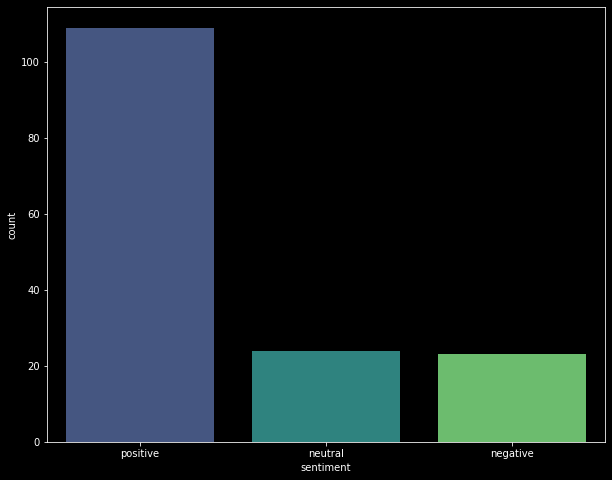

In [56]:
plt.style.use('dark_background')  

plt.figure(figsize=(10,8))
sns.countplot(x = df['sentiment'], palette='viridis');


interval columns not set, guessing: ['score']


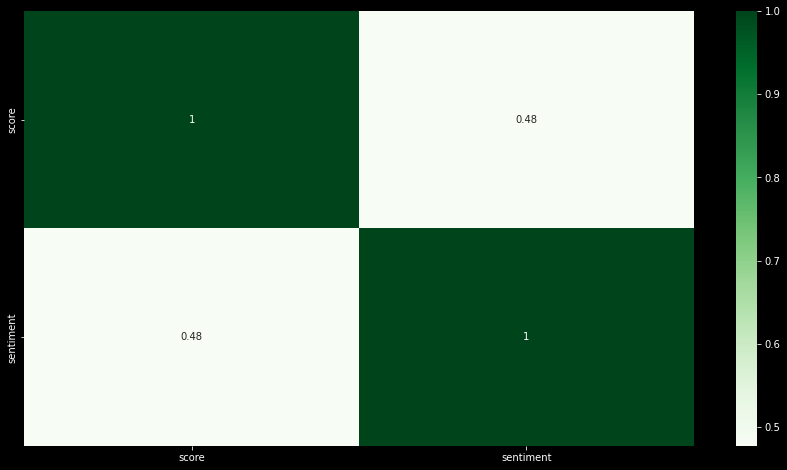

In [53]:
metrics = df[['score', 'sentiment']]
plt.figure(figsize=(15,8))
sns.heatmap(metrics.phik_matrix(), annot=True, cmap='Greens');

In [ ]:
#df.to_csv('../data/dataTwitter_SENT.csv', index=False)

### 2. Text Pre-processing

 - Removing links (http | https)

In [57]:
cleaned_reviews = []
df['tidy_text'] = df['content']

for index, row in df.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.tidy_text.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

# We are keeping cleaned tweets in a new column called 'tidy_text'
df['tidy_text'] = cleaned_reviews
df.head()

,content,score,in_english,word_count,VADER,TextBlob,sentiment,tidy_text
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive,positive,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech."
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral,neutral,How i can verify my twitter's acc??
2,Love this app,5,1,3,positive,positive,positive,Love this app
5,Works for me!,4,1,3,neutral,neutral,neutral,Works for me!
6,Love it,5,1,2,positive,positive,positive,Love it


 - Removing '@users'

In [58]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [59]:
df['tidy_text'] = np.vectorize(remove_pattern)(df['tidy_text'], "@[\w]*")
df.head()

,content,score,in_english,word_count,VADER,TextBlob,sentiment,tidy_text
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive,positive,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech."
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral,neutral,How i can verify my twitter's acc??
2,Love this app,5,1,3,positive,positive,positive,Love this app
5,Works for me!,4,1,3,neutral,neutral,neutral,Works for me!
6,Love it,5,1,2,positive,positive,positive,Love it


 - Removing Punctuations, Numbers and Special characters

In [60]:

REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\¡)|(\?)|(\¿)|(\@)|(\#)|(\%)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)|(\⃣)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_text(text):
    
    text = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in text]
    text = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in text]
    
    return text

In [61]:
text = df['tidy_text']
text_clean = preprocess_text(text)

In [62]:
df['tidy_text'] = text_clean
df.head(5)

,content,score,in_english,word_count,VADER,TextBlob,sentiment,tidy_text
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive,positive,never had or was intestate in jumping on twitter in the past with musk buying it out recently and opening it up to free speech thought i'd try it out and i love it it feels great to have an open forum where you really have freedom of speech
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral,neutral,how i can verify my twitter's acc
2,Love this app,5,1,3,positive,positive,positive,love this app
5,Works for me!,4,1,3,neutral,neutral,neutral,works for me
6,Love it,5,1,2,positive,positive,positive,love it


 - Removing emojis

In [63]:
def clean_emoji(text):

    emoji_text = re.compile("["
                           u"\U0001F600-\U0001F94F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_text.sub(r'', text)

In [64]:
df['tidy_text'] = df['tidy_text'].apply(clean_emoji)
df.head()

,content,score,in_english,word_count,VADER,TextBlob,sentiment,tidy_text
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive,positive,never had or was intestate in jumping on twitter in the past with musk buying it out recently and opening it up to free speech thought i'd try it out and i love it it feels great to have an open forum where you really have freedom of speech
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral,neutral,how i can verify my twitter's acc
2,Love this app,5,1,3,positive,positive,positive,love this app
5,Works for me!,4,1,3,neutral,neutral,neutral,works for me
6,Love it,5,1,2,positive,positive,positive,love it


 - Stop Words

In [66]:

stopwords_set = set(stopwords)
cleaned_tweets = []

for index, row in df.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.tidy_text.split() if not word in stopwords and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
df['absolute_tidy_text'] = cleaned_tweets
df.head()

,content,score,in_english,word_count,VADER,TextBlob,sentiment,tidy_text,absolute_tidy_text
0,"Never had or was intestate in jumping on Twitter in the past. With Musk buying it out recently and opening it up to free speech, thought I'd try it out, and I love it. It feels great to have an open forum where you really have freedom of speech.",5,1,49,positive,positive,positive,never had or was intestate in jumping on twitter in the past with musk buying it out recently and opening it up to free speech thought i'd try it out and i love it it feels great to have an open forum where you really have freedom of speech,never intestate jumping twitter past musk buying recently opening free speech thought i'd try love feels great open forum really freedom speech
1,How i can verify my twitter's acc??,2,1,7,neutral,neutral,neutral,how i can verify my twitter's acc,verify twitter's acc
2,Love this app,5,1,3,positive,positive,positive,love this app,love app
5,Works for me!,4,1,3,neutral,neutral,neutral,works for me,works
6,Love it,5,1,2,positive,positive,positive,love it,love


In [21]:
# df.to_csv('../data/clean_data.csv', index=False)

### 3. Vectorization

In [67]:
from sklearn.feature_extraction.text import CountVectorizer 

In [68]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['absolute_tidy_text'])
#vectorizer.get_feature_names()

In [69]:
baseline_vectorizer = CountVectorizer(binary=True)
baseline_vectorizer.fit(df['absolute_tidy_text'])

CountVectorizer(binary=True)

In [70]:
X_baseline = baseline_vectorizer.transform(df['absolute_tidy_text'])


In [71]:
x = baseline_vectorizer.vocabulary_

In [72]:
top_words = sorted(x.items(), key=lambda item: item[1], reverse = True)
top_words[:25]

[('youre', 544),
 ('yes', 543),
 ('years', 542),
 ('xzs', 541),
 ('xperia', 540),
 ('wrong', 539),
 ('would', 538),
 ('worst', 537),
 ('worse', 536),
 ('world', 535),
 ('works', 534),
 ('working', 533),
 ('worked', 532),
 ('work', 531),
 ('wonderful', 530),
 ('without', 529),
 ('within', 528),
 ('wion', 527),
 ('window', 526),
 ('willing', 525),
 ('whole', 524),
 ('whoever', 523),
 ('went', 522),
 ('well', 521),
 ('weeks', 520)]

- n-grams

In [6]:
df = pd.read_csv('../data/clean_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/clean_data.csv'

In [73]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

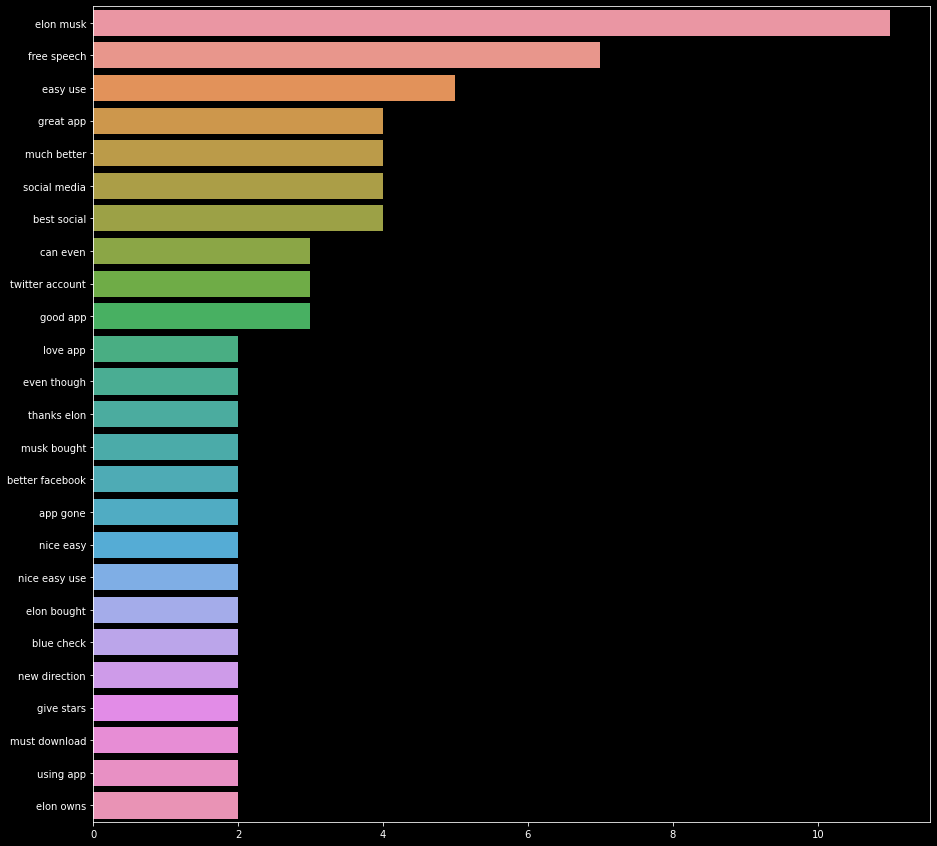

In [74]:
plt.figure(figsize=(15,15))
top_tweet_bigrams=get_top_tweet_bigrams(df['absolute_tidy_text'])[:25]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x);

### 4. Most common words in positive and negative tweets

In [75]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_words = 20, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [76]:
all_words_pos = ' '.join([text for text in df['absolute_tidy_text'][df.sentiment == 'positive']])
all_words_neg = ' '.join([text for text in df['absolute_tidy_text'][df.sentiment == 'negative']])


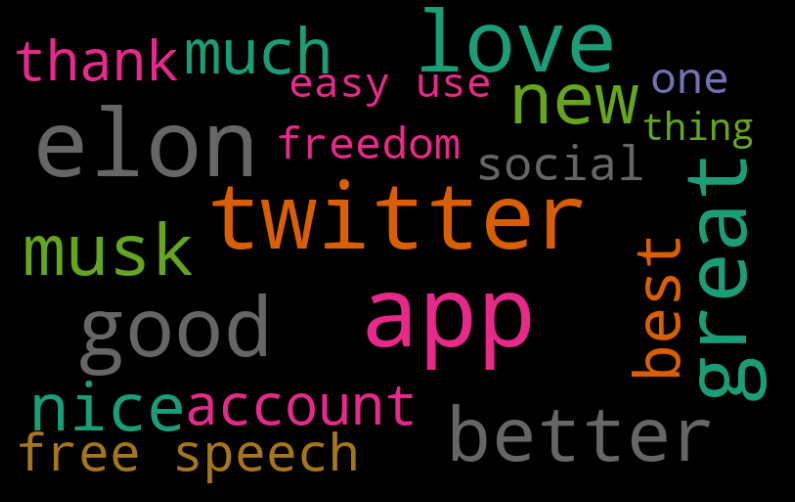

In [77]:
generate_wordcloud(all_words_pos)

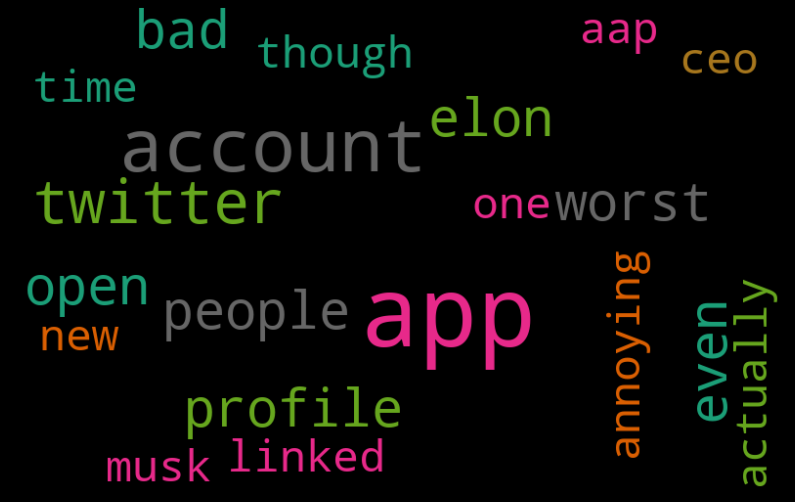

In [78]:
generate_wordcloud(all_words_neg)

#### Thers's a significant difference between positive and negative tweets:
 - positive tweets mention 'bootcamp' and 'scholarship', and IT fields as Data Science and Cyber Security;
 - we also found words related to the work, as 'profesionals', 'company', 'sector', and 'internship agreement';
 - we can see positive words like 'tanhk you', 'future' or 'first';
 - negative tweets also use positive words as 'thank you' or 'sure', bur probably in a sarcastic way;
 - wa also found words relative to media, as 'podcast' or 'live'

### 6. Named Entities Recognition (NER)

In [79]:
es_model = en_core_news_sm.load()

NameError: name 'en_core_news_sm' is not defined

In [168]:
no_mentions = df['tweet'].str.replace("(@).*","")
no_hastags = no_mentions.str.replace("(#).*","")
proc_tweets  = no_hastags.apply(clean_emoji)
tweets_list = list(proc_tweets)


c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
c:\Users\IRENE\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [172]:
col_1 = []
col_2 = []

for doc in list(tweets_list):
    nlp = es_model(doc)
    entities = [(token.text, token.label_) for token in nlp.ents]
    col_1.append(doc)
    col_2.append(entities)

data = pd.DataFrame(list(zip(col_1, col_2)),
               columns =['Tweet', 'Entities'])
data.head(10)

,Tweet,Entities
0,Ya están aquí nuestros primeros mini emprendedores pasándoselo en grande mientras empiezan el proceso de ideación de sus proyectos- Con el programa de,"[(Con el programa, MISC)]"
1,¡Feliz Día a nuestros Lead Instructors y Teacher Assistants! Sabemos que en ocasiones un,"[(Feliz Día, MISC), (Lead Instructors, ORG), (Teacher Assistants!, PER)]"
2,Recordaros que la semana que viene tenemos la primera quedada,[]
3,¡Vuelven las,[]
4,El desarrollador web es uno de los perfiles más demandados en el mercado laboral Descubre nuestro,[]
5,,[]
6,Hoy por fin ve la luz mi primer Case Study público. Un trabajo intensivo de fin de bootcamp realizado con un cliente real,"[(Case Study, MISC)]"
7,¡Nuevo acuerdo de colaboración con,[]
8,"¿Eres o quieres ser talento IT y estás en España? Si la respuesta es sí, te contamos que tenemos alianzas con",[]
9,¡Estamos muy orgullosos de formar equipo junto a,[]


In [178]:
doc = es_model(str(proc_tweets))

displacy.render(doc, style='ent', jupyter=True)

As we can observe, we don't get accurated information with spacey's spanish model, wich is not very suited for the charasterictic writing style of Tweeter. We can see how its performance is much better with traditional writing:

In [179]:
es_docs = ["Apple está considerando comprar una startup del Reino Unido por $ 1 mil millones", "Me encanta conducir mi auto deportivo Ferrari por las calles de Los Ángeles",
          "Me encantaría viajar a Japón para visitar Tokio Disneyland"]

for doc in es_docs:
    nlp = es_model(doc)
    entities = [(token.text, token.label_) for token in nlp.ents]
    print("Document:\n{}\nEntities:\n{}\n\n".format(doc, entities))

Document:
Apple está considerando comprar una startup del Reino Unido por $ 1 mil millones
Entities:
[('Apple', 'ORG'), ('Reino Unido', 'LOC')]


Document:
Me encanta conducir mi auto deportivo Ferrari por las calles de Los Ángeles
Entities:
[('Ferrari', 'ORG'), ('Los Ángeles', 'MISC')]


Document:
Me encantaría viajar a Japón para visitar Tokio Disneyland
Entities:
[('Japón', 'LOC'), ('Tokio', 'LOC')]


